In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from collections import Counter
from sklearn import metrics
%matplotlib inline

In [2]:
df=pd.read_csv("./heart.csv")
df.drop_duplicates(inplace=True)


In [3]:
X=df.drop("target",axis=1)
y=df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)


In [4]:
#test if the data is splitted correctly
print(y_test.unique())
Counter(y_train)

[1 0]


Counter({0: 113, 1: 128})

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
from xgboost import XGBClassifier
from sklearn.metrics import r2_score
from collections.abc import Mapping



xgb = XGBClassifier(colsample_bylevel= 0.9,
                    colsample_bytree = 0.8,
                    gamma=0.99,
                    max_depth= 5,
                    min_child_weight= 1,
                    n_estimators= 8,
                    nthread= 5,
                    random_state= 0,
                    )
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.99, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=8, n_jobs=None, nthread=5,
              num_parallel_tree=None, ...)

In [9]:
print('Accuracy of XGBoost classifier on training set: {:.2f}'
     .format(xgb.score(X_train, y_train)))
print('Accuracy of XGBoost classifier on test set: {:.2f}'
     .format(xgb.score(X_test, y_test)))

Accuracy of XGBoost classifier on training set: 0.95
Accuracy of XGBoost classifier on test set: 0.77


In [11]:
from sklearn import metrics

y_pred=xgb.predict(X_test)
print("Accuracy of XG Boost model is:",
metrics.accuracy_score(y_test, y_pred)*100)

Accuracy of XG Boost model is: 77.04918032786885


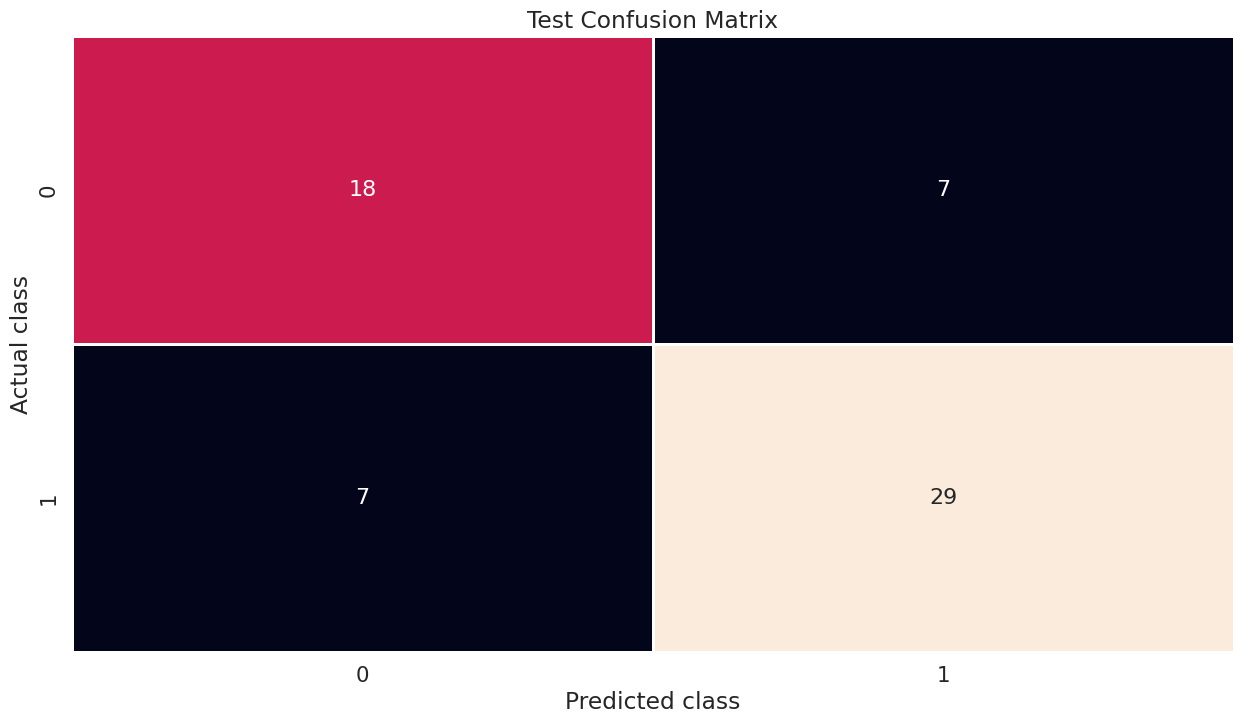

In [12]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
plt.figure(figsize = (15, 8))
sns.set(font_scale=1.4) # for label size
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16},cbar=False, linewidths = 1) # font size
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('conf_test.png')
plt.show()